Hoje continuaremos com associações entre variáveis e depois conheceremos um pouco sobre distribuições de probabilidade.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import bernoulli

**Tópicos**:
 
 - Análise Bidimensional:
     - Associação Entre Variáveis Quantitativas (parte II)
         - Correlação de Spearman
         - Spearman vs Pearson
     - Associação Entre Variáveis Qualitativas e Quantitativas
          - Correlação Point-Biserial
          - R2
          
 - Distribuições de Probabilidade
     - O que são Distribuições de Probabilidade
     - Distribuições Discretas
         - Distribuição de Bernoulli
         - Distribuição Binomial
     - Distribuições Contínuas
         - Distribuição Normal
         - Distribuição Normal Padrão
 - Exercício


# Análise Bidimensional

Vamos continuar com os estudos sobre análise bidimensional, olhando para associações entre variáveis quantitativas.

## Associação Entre Variáveis Quantitativas (parte II)

Vimos a correlação de Pearson e como ela pode ser calculada com numpy e pandas. Agora, será introduzido um novo meio de medir essa relação, que apresenta algumas vantagens. Vimos que a correlação de pearson varia de  -1 a 1 e que esta mede a relação <i>linear</i> entre variáveis quantitativas. Mas e se a relação não for linear? Bom, aí podemos utilizar a correlação de Spearman.

## Correlação de Spearman

Para calcular a correlação de Spearman, vamo seguir o passo a passo:

<ol>
    <li> Extrair o ranking de valores para as variáveis</li>
    <li> Calcular a distância dos rankings </li>
    <li> Calcular a distância ao quadrado</li>
    <li> Aplicar a equação de Spearman </li>
</ol>

In [2]:
# Dados para teste
df_spearman = pd.DataFrame({'x':[73, 76, 78, 65, 86, 82, 91],
                            'y':[77, 78, 79, 80, 86, 89, 95]})
df_spearman

,x,y
0,73,77
1,76,78
2,78,79
3,65,80
4,86,86
5,82,89
6,91,95


**1. Extrair o ranking de valores para as variáveis**

Vamos extrair o ranking de cada valor em relação às suas respectivas colunas.

In [3]:
df_spearman['x_rank'] = df_spearman['x'].rank(ascending = False)
df_spearman['y_rank'] = df_spearman['y'].rank(ascending = False)

In [4]:
df_spearman

,x,y,x_rank,y_rank
0,73,77,6.0,7.0
1,76,78,5.0,6.0
2,78,79,4.0,5.0
3,65,80,7.0,4.0
4,86,86,2.0,3.0
5,82,89,3.0,2.0
6,91,95,1.0,1.0


**2. Calcular a distância dos rankings**

Agora vamos calcular as diferenças de ranking por linhas.

In [5]:
df_spearman['d'] = df_spearman['x_rank'] - df_spearman['y_rank']
df_spearman

,x,y,x_rank,y_rank,d
0,73,77,6.0,7.0,-1.0
1,76,78,5.0,6.0,-1.0
2,78,79,4.0,5.0,-1.0
3,65,80,7.0,4.0,3.0
4,86,86,2.0,3.0,-1.0
5,82,89,3.0,2.0,1.0
6,91,95,1.0,1.0,0.0


**3. Calcular a distância ao quadrado**

In [6]:
df_spearman['d2'] = df_spearman['d']**2
df_spearman

,x,y,x_rank,y_rank,d,d2
0,73,77,6.0,7.0,-1.0,1.0
1,76,78,5.0,6.0,-1.0,1.0
2,78,79,4.0,5.0,-1.0,1.0
3,65,80,7.0,4.0,3.0,9.0
4,86,86,2.0,3.0,-1.0,1.0
5,82,89,3.0,2.0,1.0,1.0
6,91,95,1.0,1.0,0.0,0.0


**4. Aplicar a equação de Spearman**

<img src="https://bloqm.files.wordpress.com/2013/10/rho-de-spearman.jpg" height=300 width=300>

In [7]:
sum_d2 = df_spearman['d2'].sum()
n = len(df_spearman)
rs = 1 - (6*sum_d2)/(n*(n**2-1))

In [8]:
rs

0.75

Vamos validar nosso método, comparando-o com o resultado obtido pelo método ```.corr(method='spearman')``` do pandas

In [9]:
df_spearman[['x' , 'y']].corr(method = 'spearman')

,x,y
x,1.00,0.75
y,0.75,1.00


## Spearman vs Pearson

### Não Linearidade

Vamos ver como Spearman consegue captar padrões que Pearson deixa "passar"

In [10]:
# variavel independente
x = np.arange(-10,10)

In [11]:
# variável dependente
# curva expoencial
y = np.exp(x)

In [12]:
df_correlations = pd.DataFrame({'x':x , 'y': y})

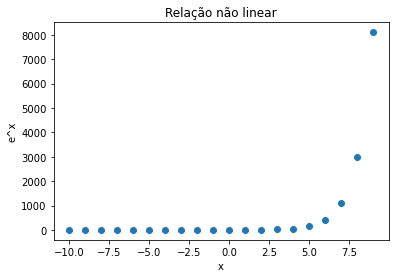

In [13]:
# Grafico de X e Y
plt.scatter(x , y)
plt.xlabel('x')
plt.ylabel('e^x')
plt.title('Relação não linear')
plt.show()


In [14]:
#Correlação de Pearson
df_correlations.corr()

,x,y
x,1.000000,0.538701
y,0.538701,1.000000


In [15]:
#Correlação de Spearman
df_correlations.corr(method = 'spearman')

,x,y
x,1.0,1.0
y,1.0,1.0


Note que a correlação de Pearson não consegue captar uma relação não-linear tão bem quanto a de Spearman.

### Outliers

Quando existem outliers na amostra, a correlação de pearson é fortemente afetada, podendo resultar até mesmo numa inversão de tendência.

In [16]:
# Variável independente
x1 = np.arange(1,11)
# Variável dependente
y1 = -0.1*x1

In [17]:
x1 = np.append(x1, [30])
y1 = np.append(y1, [50])

In [18]:
df_correlations1 = pd.DataFrame({'x1':x1, 'y1':y1})

Text(0.5, 1.0, 'Relação Não-Linear')

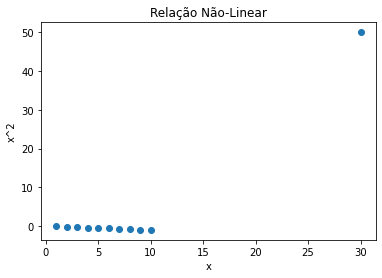

In [19]:
plt.scatter(x1, y1)
plt.xlabel('x')
plt.ylabel('x^2')
plt.title('Relação Não-Linear')

In [20]:
# correlação de pearson para x^2
df_correlations1.corr()

,x1,y1
x1,1.00000,0.92503
y1,0.92503,1.00000


In [21]:
# correlação de spearman para x^2
df_correlations1.corr(method='spearman')

,x1,y1
x1,1.0,-0.5
y1,-0.5,1.0


## Associação Entre Variáveis Qualitativas e Quantitativas

Nossa última possível combinação entre natureza de variáveis é o caso de querermos medir relações entre uma variável qualitativa e uma variável quantitativa. Para isso utilizaremos a correlação Point-Biserial e a análise de R2.

### Correlação Point-Biserial

A correlaçao Point-Biserial é um caso particular da correlação de Pearson. É usada para casos em que têm-se uma variável dicotômica (2 valores possíveis) e uma variável contínua.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/790e9e1b2fd9213233a747036ff6b87efe4efb5e)

Assim como as demais correlações, a Point-Biserial varia de -1 a 1. Na equação acima:

```M1```: Média da variável contínua para o grupo 1<br>
```M0```: Média da variável contínua para o grupo 0<br>
```n1```: Número de observações do grupo 1<br>
```n0```: Número de observações do grupo 0<br>
```n```:  Número total de observações<br>
```Sn```: Desvio Padrão Populacional<br>

Vamos criar uma variável contínua cuja. Porém, vamos constituí-la de um primeiro grupo, x1, cuja média é 10 e desvio padrão é 10 e outro grupo, x2, cuja média é 60 e desvio padrão é 10. Criaremos 100 amostras para as quais a variável y corresponde a 1 e 100 para as quais a variável y é 0.

In [22]:
np.random.seed(10)
x1 = np.random.normal(10, 10, 100)
x2 = np.random.normal(60, 10, 100)
y = 100*[0] + 100*[1]

In [23]:
df_pb = pd.DataFrame({'x':np.concatenate([x1,x2]), 'y':y})

In [24]:
M0 = df_pb.groupby('y').mean().iloc[0,0]
M1 = df_pb.groupby('y').mean().iloc[1,0]
std_ = df_pb['x'].std(ddof=0)

In [25]:
((M1-M0)/std_)*np.sqrt(0.5**2)

0.931246752810707

A correlação Point-Biserial será numericamente igual a Correlação de Pearson.

In [26]:
df_pb.corr()

,x,y
x,1.000000,0.931247
y,0.931247,1.000000


### R2

A última medida de associação entre as variáveis que veremos é o R2. O R2 quantifica o quanto, em %, a variável X explica a variável Y. E para isso, ele utiliza o conceito de variância, o qual já vimos!.
A lógica por trás desse cálculo é a seguinte:<br>

Vamos medir a variância do nosso conjunto de dados Y. Se a variância de Y, quando olhada dentro de grupos X, for menor, significa que X explica uma parcela (%) de Y. Esse % é justamente nosso R2.

Imagine a variável salário! Dentro de uma empresa o salário pode variar desde RS 5.000,00 a RS 100.000,00. Uma alta variabilidade, concorda? Mas se olharmos os grupos (cargos) separadamente, o salário tende a variar pouco entre os gerentes, C-Level, Tech Leads, pois cargos parecidos tendem a ganhar salários parecidos. Ou seja, a variabilidade diminui quando olhamos a variável salário pela perspectiva dos cargos.

In [27]:
# Variável salário para cada cargo de engenharia
estg = np.random.choice(np.arange(1000, 2000), 100)
eng_jr = np.random.choice(np.arange(4500, 7000), 100)
eng = np.random.choice(np.arange(6500, 8000), 100)
eng_sr = np.random.choice(np.arange(7500, 11000), 100)
salarios = np.concatenate([estg, eng_jr, eng, eng_sr])

In [28]:
cargo = 100*['estg'] + 100*['eng_jr'] + 100*['eng'] + 100*['eng_sr']

In [29]:
df_salario = pd.DataFrame({'Cargo': cargo , 'Salário' : salarios})
df_salario

,Cargo,Salário
0,estg,1265
1,estg,1283
2,estg,1308
3,estg,1346
4,estg,1825
...,...,...
395,eng_sr,9521
396,eng_sr,9155
397,eng_sr,9444
398,eng_sr,7515


In [30]:
var_total = (df_salario['Salário'].std())**2

In [31]:
var_total

9028016.004204256

Agora iremos calcular a variância olhando pela perspectiva dos cargos. Para isso precisaremos de uma medida-resumo, que pode ser a média. Mas iremos ponderar a média das variâncias pelo número de observações de cada grupo.

In [32]:
var_estg = (estg.std())**2
var_eng_jr = (eng_jr.std())**2
var_eng = (eng.std())**2
var_eng_sr = (eng_sr.std())**2

In [33]:
var_combinada = (100*var_estg + 100*var_eng_jr + 100*var_eng + 100*var_eng_sr)/400

In [34]:
var_combinada

437215.165625

In [35]:
var_total > var_combinada

True

# Distribuições de Probabilidade

Uma distribuição de probabilidade é um modelo matemático capaz de nos fornecer a probabilidade de ocorrência de um evento.

Podemos classificá-las em dois tipos:
- Discreta
- Contínua

As distribuições discretas são utilizadas para modelar variáveis contáveis, como o número de gols numa partida de futebol (0,1,2,3,4...)

As distribuições contínuas, por sua vez, são utilizadas quando queremos modelar variáveis cujas ocorrências podem estar associadas a infinitos valores dentro de um intervalo. Exemplo: Temperatura. A temperatura de uma cidade pode assumir qualquer valor entre 10 e 20 graus, seja ele 10.1, 10.2, 10.2123, 10.2345, e assim por diante. São infinitos valores possíveis.

Vamos ver alguns casos especiais de cada uma dessas distribuições!

## Distribuições Discretas

### Uniforme

Quando os valores possíveis para um evento possuírem igual probabilidade de ocorrência, dizemos que estes seguem uma distribuição uniforme.

Um exemplo claro desse caso é o lançamento de um dado não viciado.

Um dado possui 6 lados e, se não estiver viciado, cada face possuirá igual probabilidade de ocorrer em um lançamento.

Nesse caso, o modelo matemático que descreve a probabilidade para as possíveis ocorrências é:

Onde P é a probabilidade, x são os valores possíveis e n a quantidade de elementos possíveis de ocorrer.

Vamos simular o lançamento de um dado e observar a distribuição dos resultados obtidos.

In [36]:
# seed
np.random.seed(100)
# numero de lançamentos
n= 10000
# valor mínimo
valor_min = 1
# valor máximo
valor_max = 6 + 1 
lancamentos = np.random.randint(low=valor_min, high=valor_max, size=n)

C:\Users\vibrsilva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Face Obtida'>

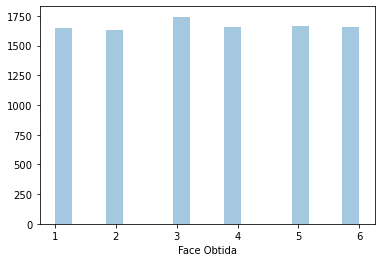

In [37]:
sns.distplot(lancamentos , axlabel= 'Face Obtida' , kde= False)

Note que cada face ocorre um número próximo de vezes.

In [38]:
df_lancamentos = pd.DataFrame(lancamentos , columns = ['Face'])

In [39]:
df_lancamentos.groupby('Face').size()

Face
1    1650
2    1630
3    1743
4    1659
5    1662
6    1656
dtype: int64

### Bernoulli

A distribuição de Bernoulli é uma outra distribuição discreta, cujo propósito é avaliar a probabilidade de sucesso de um evento. Por sucesso, fala-se em um evento de interesse do pesquisador. 
A probabilidade de sucesso do evento é p e a probabilidade de fracasso é 1 - p.

Um exemplo bastante comum dessa distribuição envolve o lançamento de uma moeda, em que dar "coroa" pode ser o evento de sucesso com probabilidade p e dar "cara" pode ser o evento de fracasso, de probabilidade 1 - p. Quando a moeda não é viciada, espera-se que  p = 0.5.

Porém, há uma série de aplicações bastante conhecidas e definidas que utilizam distribuição de bernoulli, tais como:
- Ramo de Seguros
- Ramo de Crédito

**Na distribuição de Bernoulli, a média é sempre a probabilidade de sucesso, p, e a a variância é p(1-p)**

Para simular um evento que segue uma distribuição de Bernoulli, usamos a biblioteca scipy e o módulo stats. ```scipy.stats```

In [42]:
bernoulli_dist = bernoulli.rvs(p= 0.7, #probabilidade de sucesso
                              size = 100000, #numero de experimentos
                              loc = 0, #fracasso
                              random_state=12) # seed

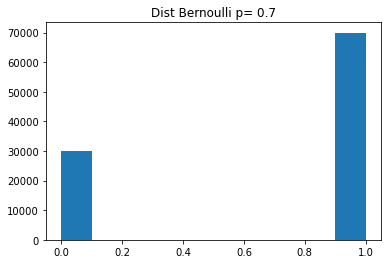

In [43]:
plt.hist(bernoulli_dist)
plt.title("Dist Bernoulli p= 0.7")
plt.show()

In [44]:
#Média
bernoulli_dist.mean()

0.69962

In [45]:
# variância
bernoulli_dist.var()

0.21015185560000002

## Distribuição binomial

Agora, imagine que repetimos um ensaio de bernoulli (o lançamento de uma moeda, por exemplo) um número n de vezes. A quantidade de vezes que obtivemos sucesso nos n ensaios resultaram em uma probabilidade. 

Exemplo: Qual a probabilidade de obtermos 2 caras em 5 lançamentos de uma moeda não viciada ?

Se realizarmos m vezes os 5 lançamentos, conseguimos construir uma curva de probabilidade e responder essa pergunta.

![](https://miro.medium.com/max/2100/1*WVD2_j2CJkb14LR7nVsvjw.jpeg)

In [49]:
# numero de trials 
n_trials = 10000
# probabilidade de sucesso
p = 0.5
# numero de lançamentos em um trial
n_lancamentos = 5
# numero de sucessos
n_sucessos = 2

In [50]:
resultados_trial = []
for i in range(n_trials):
    bernoulli_dist = bernoulli.rvs(p=p, # probabilidade de sucesso
                               size=n_lancamentos, # numero de experimentos
                               loc=0) # fracasso
    resultados_trial.append(sum(bernoulli_dist))

<AxesSubplot:>

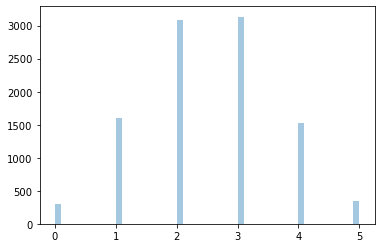

In [51]:
sns.distplot(resultados_trial,kde=False)

In [52]:
Counter(resultados_trial).items()

dict_items([(3, 3135), (1, 1599), (5, 352), (2, 3084), (4, 1529), (0, 301)])

In [53]:
df_trials = pd.DataFrame(Counter(resultados_trial).items(), columns=['Heads', 'Contagem'])

In [54]:
df_trials['Frequência'] = df_trials['Contagem']/10000

In [55]:
df_trials

,Heads,Contagem,Frequência
0,3,3135,0.3135
1,1,1599,0.1599
2,5,352,0.0352
3,2,3084,0.3084
4,4,1529,0.1529
5,0,301,0.0301


Também temos a forma "analítica" de construir uma curva de probabilidade para esse tipo de ensaio, utilizando a equação abaixo.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/9757f2616b6e9dffea51a6d9bcf9f958988063c3)

Onde:<br>
```n```: Número de ensaios<br>
```p```: Probabilidade de Sucesso<br>
```k```: Número de sucessos<br>

Lembram do Fatorial?

**Fatorial de 5**: 5 x 4 x 3 x 2 x 1

Aplicando ao nosso caso: n = 5, p = 0.5, k = 2

In [59]:
n=5
p=0.5
k=2

In [60]:
import math

In [61]:
probabilidade = (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))*(p**k)*(1-p)**(n-k)

In [62]:
probabilidade

0.3125

Note que para distribuições discretas, podemos associar diretamente um valor (observação) a uma probabilidade por meio de uma função matemática ou simulação. Essa função matemática se chama Função de Massa de Probabilidade.

Exemplo de Aplicação: Call Center

Imagine que você trabalha como cientista em uma empresa de Call Center e você encontra as seguintes informações sobre a operação:
* A probabilidade de conversão de um cliente a cada ligação é 4% <br>
* Cada funcionário faz em média 50 ligações por dia <br>
* A receita média que cada cliente traz é RS 20.00 <br>
* A empresa tem 100 funcionários ligando para clientes<br>
* Cada funcionário recebe um salário de RS 200.00 por dia de trabalho<br>

Vocês conseguem imaginar os funcionários como distribuições binomiais?

Cada funcionário é uma distribuição binomial, cujo p=4% e n=50.

In [64]:
# Simulação do call center

# numero de funcionarios
funcionarios = 100
# Salario dos funcionarios
salario = 200
# numero de ligações
n_ligacoes = 50
# probabilidade de sucesso da ligação 
p = 0.04
#receita trazida por um sucesso
receita = 100

In [65]:
# vamos criar uma binomial com esses parâmetros
np.random.seed(200)
sucessos_ligacoes = np.random.binomial(n_ligacoes, p, size=funcionarios)
# Algumas métricas do nosso call center
print('Conversão Média : ' + str(round(np.mean(sucessos_ligacoes), 2)))
print('Receita Total (1 dia): ' + str(np.sum(sucessos_ligacoes)*receita))
print('Despesa com Funcionários (1 dia): ' + str(funcionarios*salario))
print('Lucro de 1 dia: ' + str(np.sum(sucessos_ligacoes)*receita - funcionarios*salario))

Conversão Média : 2.25
Receita Total (1 dia): 22500
Despesa com Funcionários (1 dia): 20000
Lucro de 1 dia: 2500


In [66]:
# vamos simular 365 dias
lucro = []
for i in range(365):
    sucessos_ligacoes = np.random.binomial(n_ligacoes, p, size=funcionarios)
    lucro.append(np.sum(sucessos_ligacoes)*receita - funcionarios*salario)

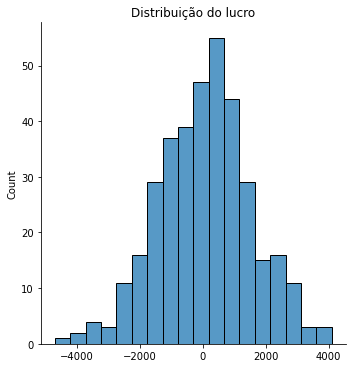

In [68]:
sns.displot(lucro)
plt.title('Distribuição do lucro')
plt.show()

O que você como cientista de dados pode propor?

* Aumentar número de ligações!
* Aumentar a conversão! (COMO?) --> Faça um modelo

Vamos supor que cada funcionário recebeu treinamento e agora consegue fazer 55 ligações. E seu modelo consegue aumentar a conversão para 5%.

In [70]:
# vamos simular 365 dias
n1 = 55
p1 = 0.05
lucro1 = []
for i in range(365):
    sucessos_ligacoes1 = np.random.binomial(n1, p1, size=funcionarios)
    lucro1.append(np.sum(sucessos_ligacoes1)*receita - funcionarios*salario)

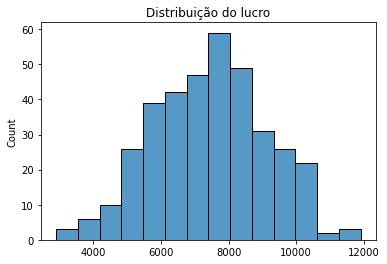

In [74]:
sns.histplot(lucro1)
plt.title('Distribuição do lucro')
plt.show()

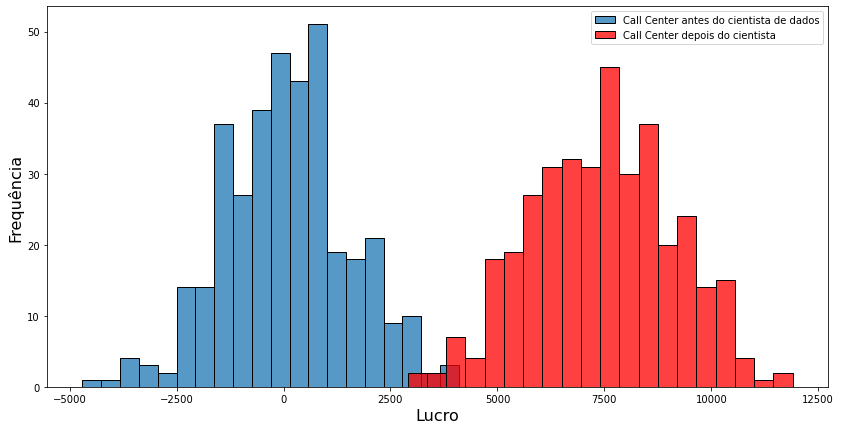

In [75]:
# Plot and save the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(lucro, bins=20, label='Call Center antes do cientista de dados')
ax = sns.histplot(lucro1, bins=20, label='Call Center depois do cientista', color='red')
ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16)
plt.legend()
plt.show()

## Distribuições Contínuas

### Distribuição Normal

![](https://i.pinimg.com/originals/34/9b/f6/349bf66317f5a051c89a7b26264c9062.jpg)

A Distribuição Normal é uma distribuiçao contínua e é uma das mais conhecidas na estatística e na ciência de dados. Isso, pois muitos fenômenos podem ser modelados por meio de uma distribuição normal.

Exemplo: Altura de uma população, Idade de uma população, retorno financeiro de ações e etc.

Matematicamente, uma distribuição é normal se segue a seguinte função de densidade de probabilidade.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/362834b765239b64cf7719a3a3a04e172c883e3d)

Pra definir essa função, precisamos de uma média, representada pela letra grega mi e um desvio padrão, representado pela letra grega sigma.

Diferentemente da Função de Massa de Probabilidade, essa Função não retorna a probabilidade, mas um valor correspondente ao que se conhece por densidade. Para calcular a probabilidade temos que encontrar a área dentro do intervalo especificado.

![](https://statistics.laerd.com/statistical-guides/img/normal-7.png)

Características interessantes:
- A curva é simétrica em relação a média
- A média, a moda e a mediana são iguais

Lembram do BoxPLot?

![](https://jingwen-z.github.io/images/20190319-boxplot-vs-pdf.png)

o IQR nos ajudava a localizar outliers na distribuição.

A distribuição normal é amplamente usada, mas já pararam pra pensar o trampo que daria para calcular as áreas? Isso envolve o cálculo de integrais, que é algo do cálculo II.

Será que existe um jeito mais fácil? Sim! Vamos ver como a curva normal padrão pode nos ajudar!

### Distribuição Normal Padrão

Os pesquisadores calcularam valores de probabilidade para uma curva específica normal. Essa curva possui média igual a 0 e desvio padrão igual a 1.

Tá, mas dificilmente nossas distribuições vão ter exatamente média 0 e desvio padrão 1, certo? Certo!

O pulo do gato é que qualquer distribuição normal poderá passar pelo processo de padronização, que ajustará os valores de tal forma que média seja igual a 0 e o desvio padrão seja igual a 1.

Para isso utilizamos a transformação abaixo:

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRKw5o96x3h5uI4_-LC9l-MANxreLjcFB_QdQ&usqp=CAU)

Vamos criar uma distribuição normal e padronizá-la!

In [76]:
normal_dist = np.random.normal(50, 5, 3000)

C:\Users\vibrsilva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


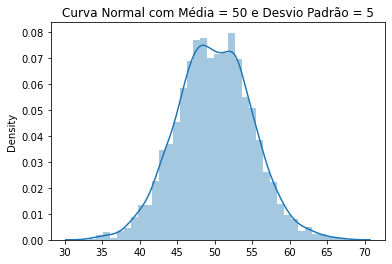

In [77]:
sns.distplot(normal_dist)
plt.title('Curva Normal com Média = 50 e Desvio Padrão = 5')
plt.show()


In [78]:
# media 
media_normal = normal_dist.mean()
# desvio 
desvio_normal = normal_dist.std()
# padronização
z_normal_dist = (normal_dist - media_normal)/desvio_normal

C:\Users\vibrsilva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


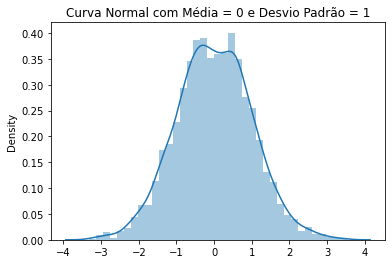

In [79]:
sns.distplot(z_normal_dist)
plt.title('Curva Normal com Média = 0 e Desvio Padrão = 1')
plt.show()


Se quisermos saber, por exemplo, qual a probabilidade de observarmos valores menores que 45, transformamos 45 para Z score e usamos a função ```stats.norm.cdf``` para obter a probabilidade.

In [80]:
z_45 = (45-media_normal)/desvio_normal

In [81]:
stats.norm.cdf(z_45)

0.16235535087010838